In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Reading the dataset
df=pd.read_csv('Walmart.csv')

In [3]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [4]:
#checking the shape of the the dataset
df.shape

(6435, 8)

In [5]:
#checking for the info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [6]:
#Statistical Analysis
df.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [7]:
#checking for the null values
df.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [8]:
#checking for the duplicate values
df.duplicated().sum()

0

C:\Users\USER\AppData\Local\Temp\ipykernel_8604\1777946953.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Correlation = df.corr()


<Axes: >

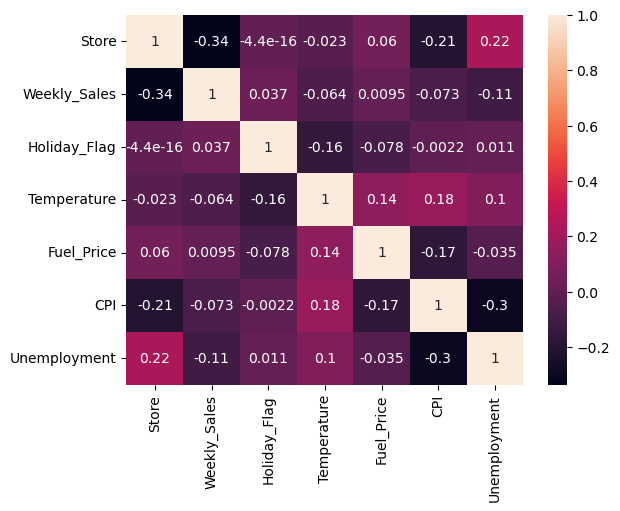

In [9]:
#checking the correlation between different columns
Correlation = df.corr()
sns.heatmap(Correlation, annot=True)

In [10]:
# weekly sales are affected by the unemployment rate,checking which stores which are suffering the most
store_data= df.groupby('Store')

In [11]:
for name, group in store_data:
    print(f'Store: {name}')
    print(group[['Weekly_Sales', 'Unemployment']].corr())
    print('\
')

Store: 1
              Weekly_Sales  Unemployment
Weekly_Sales      1.000000     -0.097955
Unemployment     -0.097955      1.000000

Store: 2
              Weekly_Sales  Unemployment
Weekly_Sales      1.000000      0.066325
Unemployment      0.066325      1.000000

Store: 3
              Weekly_Sales  Unemployment
Weekly_Sales      1.000000     -0.230413
Unemployment     -0.230413      1.000000

Store: 4
              Weekly_Sales  Unemployment
Weekly_Sales      1.000000     -0.337015
Unemployment     -0.337015      1.000000

Store: 5
              Weekly_Sales  Unemployment
Weekly_Sales      1.000000     -0.207043
Unemployment     -0.207043      1.000000

Store: 6
              Weekly_Sales  Unemployment
Weekly_Sales      1.000000      0.044251
Unemployment      0.044251      1.000000

Store: 7
              Weekly_Sales  Unemployment
Weekly_Sales      1.000000     -0.165382
Unemployment     -0.165382      1.000000

Store: 8
              Weekly_Sales  Unemployment
Weekly_Sales       

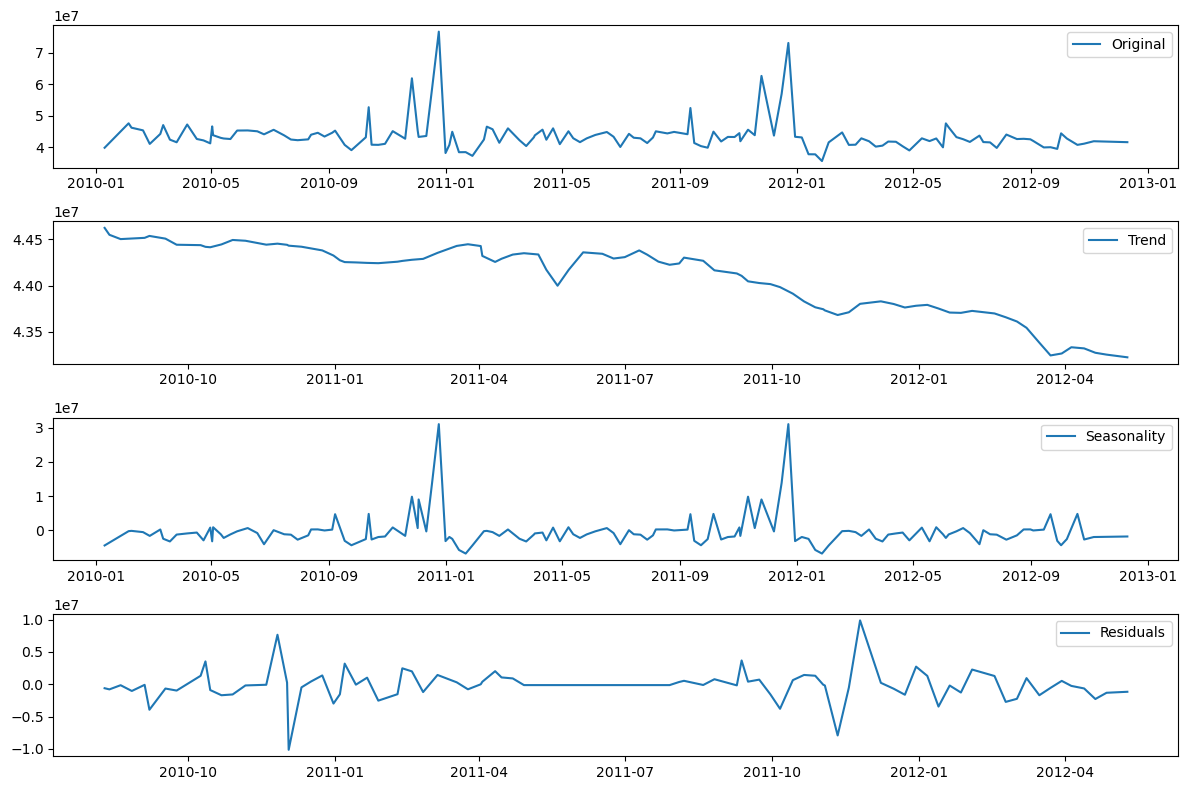

In [13]:
from statsmodels.tsa.seasonal import seasonal_decompose
# Converting Date to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Aggregating data to see overall trend
weekly_sales = df.groupby('Date')['Weekly_Sales'].sum().reset_index()

# Setting Date as index
weekly_sales.set_index('Date', inplace=True)

# Decomposing the time series to observe trends and seasonality
result = seasonal_decompose(weekly_sales['Weekly_Sales'], model='additive', period=52)

# Plotting the original data, trend, seasonal and residual components
plt.figure(figsize=(12,8))
plt.subplot(411)
plt.plot(weekly_sales['Weekly_Sales'], label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(result.trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(result.seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(result.resid, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

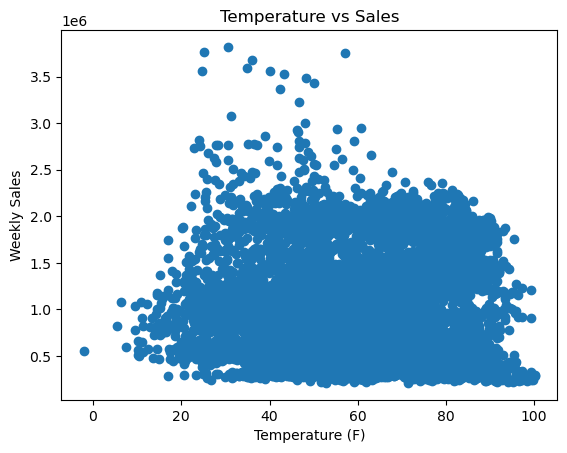

In [20]:
#checking if Temperature affects weekly sales in any manner
plt.scatter(df['Temperature'], df['Weekly_Sales'])
plt.xlabel('Temperature (F)')
plt.ylabel('Weekly Sales')
plt.title('Temperature vs Sales')
plt.show()

In [21]:
# to determine the top and the bottom stores by historical sales
#to get the weekly sales by store
store_sales = df.groupby('Store')[['Weekly_Sales']].sum()


In [22]:
store_sales = store_sales.sort_values(by='Weekly_Sales')

In [23]:
print('\
Bottom 5 Stores by Historical Sales:')
print(store_sales.head())

Bottom 5 Stores by Historical Sales:
       Weekly_Sales
Store              
33      37160221.96
44      43293087.84
5       45475688.90
36      53412214.97
38      55159626.42


In [24]:
print('\
Top 5 Stores by Historical Sales:')
print(store_sales.tail())

Top 5 Stores by Historical Sales:
       Weekly_Sales
Store              
2      2.753824e+08
13     2.865177e+08
14     2.889999e+08
4      2.995440e+08
20     3.013978e+08


In [4]:
#checking if CPI is affecting weekly sales in any manner 
store_data= df.groupby('Store')
for name, group in store_data:
    print(f'Store: {name}')
    print(group[['Weekly_Sales', 'CPI']].corr())
    print('\
')

Store: 1
              Weekly_Sales       CPI
Weekly_Sales      1.000000  0.225408
CPI               0.225408  1.000000

Store: 2
              Weekly_Sales       CPI
Weekly_Sales      1.000000 -0.062431
CPI              -0.062431  1.000000

Store: 3
              Weekly_Sales      CPI
Weekly_Sales       1.00000  0.31725
CPI                0.31725  1.00000

Store: 4
              Weekly_Sales       CPI
Weekly_Sales      1.000000  0.351157
CPI               0.351157  1.000000

Store: 5
              Weekly_Sales       CPI
Weekly_Sales      1.000000  0.308261
CPI               0.308261  1.000000

Store: 6
              Weekly_Sales       CPI
Weekly_Sales      1.000000 -0.011357
CPI              -0.011357  1.000000

Store: 7
              Weekly_Sales       CPI
Weekly_Sales      1.000000  0.289044
CPI               0.289044  1.000000

Store: 8
              Weekly_Sales       CPI
Weekly_Sales      1.000000  0.120255
CPI               0.120255  1.000000

Store: 9
              Weekly_Sales

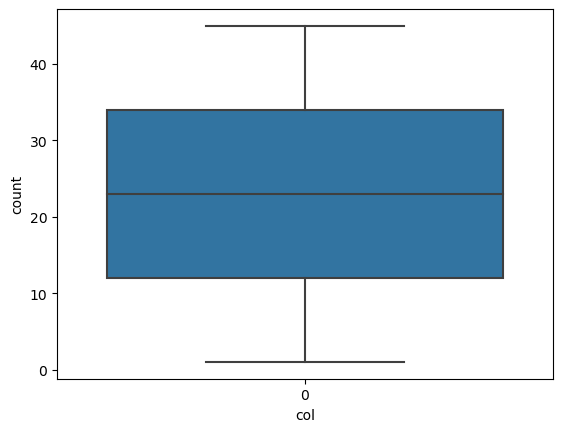

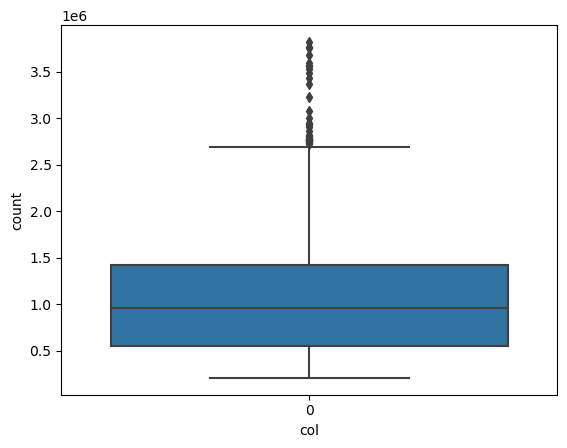

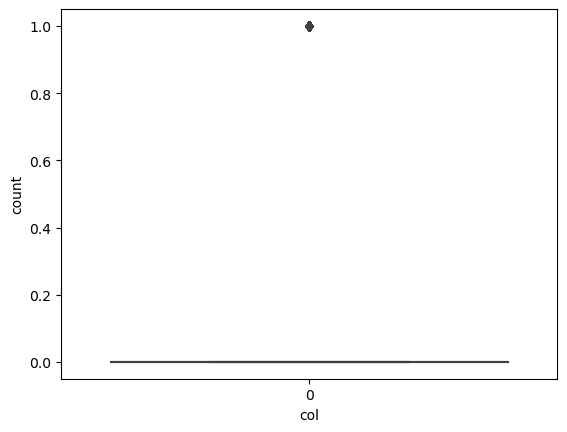

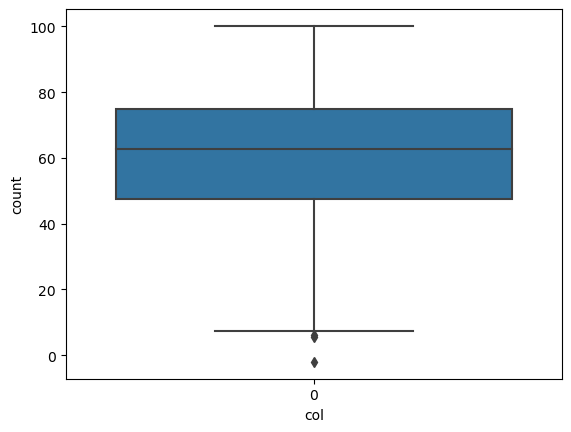

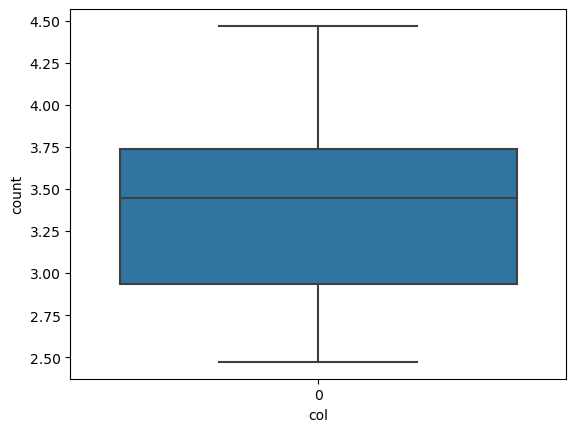

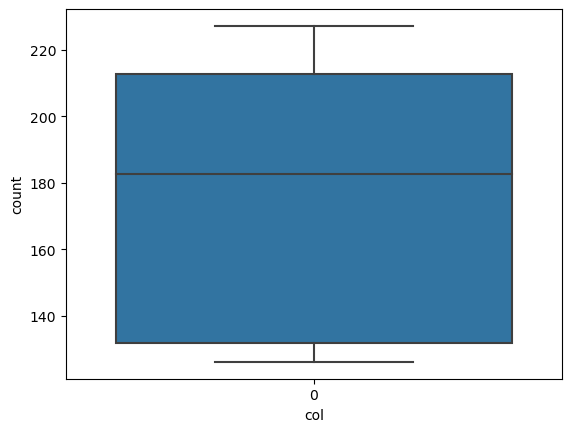

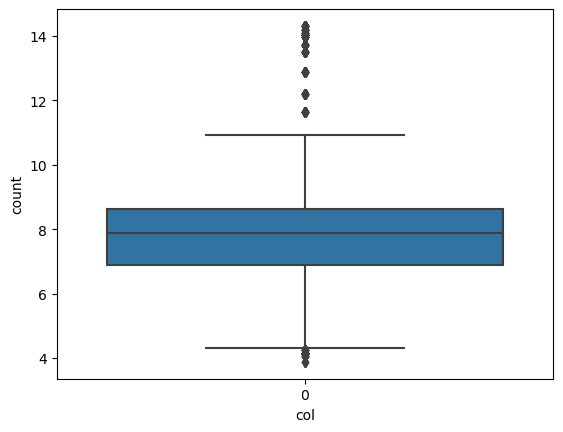

In [5]:
#checking for the outliers
for col in df.columns:
    if((df[col]).dtype=='int64') or (df[col].dtype=='float64'):
        sns.boxplot(df[col])
        plt.xlabel("col")
        plt.ylabel("count")
        plt.show()

In [6]:
#Removing the outliers from the columns below
out_list=["Weekly_Sales","Temperature","Holiday_Flag","Unemployment"]


In [8]:
for i in out_list:
    Q1=df[i].quantile(0.25)
    Q3=df[i].quantile(0.75)
    IQR=Q3-Q1

In [9]:
df=df[(df[i]>=Q1-1.5*IQR)&(df[i]<=Q3+1.5*IQR)]
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


In [10]:
from statsmodels.tsa.arima.model import ARIMA
from pandas import datetime
import warnings
warnings.filterwarnings('ignore')

# Function to train ARIMA model and make forecast
def forecast_sales(store_id, periods=12):
    # Filtering data for the store
    store_data = df[df['Store'] == store_id]
    # Preparing data
    store_sales = store_data[['Date', 'Weekly_Sales']].set_index('Date')
    store_sales.index = pd.to_datetime(store_sales.index)
    # Fitting ARIMA model
    model = ARIMA(store_sales, order=(5,1,0))
    model_fit = model.fit()
    # Forecasting
    forecast = model_fit.forecast(steps=periods)
    return forecast

# Forecasting for the top performing store
print('Forecast for Store 20 (Top Performing Store):')
forecast_top_store = forecast_sales(20)
print(forecast_top_store)

print('Forecast for Store 2 (Top Performing Store):')
forecast_top_store = forecast_sales(2)
print(forecast_top_store)

print('Forecast for Store 13 (Top Performing Store):')
forecast_top_store = forecast_sales(13)
print(forecast_top_store)

print('Forecast for Store 14 (Top Performing Store):')
forecast_top_store = forecast_sales(14)
print(forecast_top_store)

print('Forecast for Store 4 (Top Performing Store):')
forecast_top_store = forecast_sales(4)
print(forecast_top_store)

# Forecasting for the worst performing store
print('Forecast for Store 33 (Worst Performing Store):')
forecast_worst_store = forecast_sales(33)
print(forecast_worst_store)

print('Forecast for Store 44 (Worst Performing Store):')
forecast_worst_store = forecast_sales(44)
print(forecast_worst_store)

print('Forecast for Store 36 (Worst Performing Store):')
forecast_worst_store = forecast_sales(36)
print(forecast_worst_store)

print('Forecast for Store 38 (Worst Performing Store):')
forecast_worst_store = forecast_sales(38)
print(forecast_worst_store)

print('Forecast for Store 5 (Worst Performing Store):')
forecast_worst_store = forecast_sales(5)
print(forecast_worst_store)


C:\Users\USER\AppData\Local\Temp\ipykernel_1256\3551087660.py:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


Forecast for Store 20 (Top Performing Store):
143    2.088881e+06
144    2.054877e+06
145    2.055778e+06
146    2.079998e+06
147    2.074753e+06
148    2.059708e+06
149    2.066659e+06
150    2.069579e+06
151    2.065921e+06
152    2.065463e+06
153    2.068624e+06
154    2.067336e+06
Name: predicted_mean, dtype: float64
Forecast for Store 2 (Top Performing Store):
143    1.899547e+06
144    1.857345e+06
145    1.866606e+06
146    1.864091e+06
147    1.878495e+06
148    1.861834e+06
149    1.869946e+06
150    1.866690e+06
151    1.870910e+06
152    1.865635e+06
153    1.869594e+06
154    1.867425e+06
Name: predicted_mean, dtype: float64
Forecast for Store 13 (Top Performing Store):
143    2.047626e+06
144    2.012295e+06
145    2.024631e+06
146    2.024476e+06
147    2.027803e+06
148    2.018878e+06
149    2.027917e+06
150    2.024471e+06
151    2.025737e+06
152    2.022757e+06
153    2.026431e+06
154    2.023906e+06
Name: predicted_mean, dtype: float64
Forecast for Store 14 (Top Perfo